# Hinweis zu den Aufgaben

Die mit F bezeichneten Aufgaben sind fortgeschrittene Aufgaben. Die Bearbeitung ist freiwillig.

## Folgende Dateien werden benötigt

- 07_features_C001901_control.REC_ECG_clip.dat
- 07_features_C001901_control.REC_Chest_clip.dat
- 07_features_C001901_control.REC_Airflow_clip.dat

In [1]:
# Import required libs
import os #allows for access to environment variables, is part of core 
import math
import matplotlib as mpl
import matplotlib.pyplot as plt # plotting
import numpy as np # numerical arrays
import scipy as sp # scientific computing
import scipy.signal as sgn
import scipy.optimize as opt

# get versions
print(
    'Versions: mpl: ' + mpl.__version__ + 
    ', np: ' + np.__version__ + ', sp: ' + sp.__version__)

Versions: mpl: 3.3.3, np: 1.18.5, sp: 1.5.3


# Merkmalsextraktion

Merkmale beschreiben Eigenschaften eines Datensatzes. Diese Merkmale können durch verschiedene Methoden aus Biosignalen extrahiert werden.

## EKG Merkmale

### Herzfrequenz

Die Herzfrequenz haben wir bereits manuell von einem Signal abgelesen. Dies wollen wir nun automatisieren. Dafür laden wir uns zunächst wieder einen EKG-Datensatz.

In [2]:
# relative path to file
data_dir = './input-data'

# filename 
file_name = '07_features_C001901_control.REC_ECG_clip.dat'
# metadata
sampling_frequency = 200
physical_minimum=-2
physical_maximum=2
digital_minimum=-8403
digital_maximum=8404
signal_label = 'ECG'

# read signal
signal = np.fromfile(os.path.join(data_dir,file_name),dtype=np.int16)
physical_dim='mV'
plot_label = signal_label + ' [' + physical_dim + ']'
#scaling
digital_diff = digital_maximum-digital_minimum
physical_diff = physical_maximum-physical_minimum
signal = (signal-digital_minimum)/(digital_diff)*(physical_diff)+physical_minimum

# define time axis in seconds
timesteps = np.arange(signal.size)/sampling_frequency

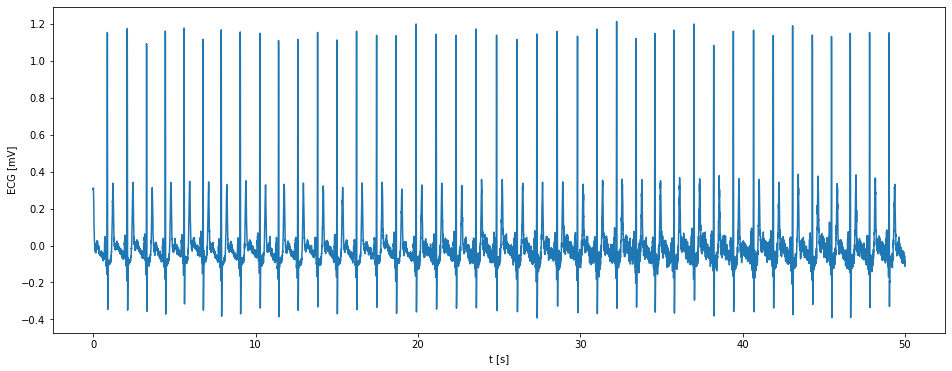

In [3]:
plt.rcParams["figure.figsize"] = (16,6)

# Signal visualisation
# Plotting commands
plt.plot(timesteps,signal)
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

**Q1:** Bestimmen Sie die Herzfrequenz visuell.

**Q2:** Berechnen Sie die Herzfrequenz mithilfe einer Fourier-Transformation.
<!-- Hinweis: 04 Signaltransformation -->

In [ ]:
plt.rcParams["figure.figsize"] = (16,6)

# fft
pass

# plot fft
mask = np.where((freq > 0) & (freq < 1.5))
plt.plot(pass, pass)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Abs [dft]')

In [4]:
### musterloesung

plt.rcParams["figure.figsize"] = (16,6)

# fft
fft = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal))*sampling_frequency

# plot fft
mask = np.where((freq > 0) & (freq < 1.5))
plt.plot(freq[mask], abs(fft.real[mask]))
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Abs [dft]')

Text(0, 0.5, 'Abs [dft]')

### musterloesung

**A2:** Die Herzfrequenz lässt sich beim höchsten Peak ablesen. Dabei wurde schon vorher der betrachtete Frequenzbereich angepasst auf den üblichen Bereich einer Herzfrequenz (<1.5). Hier liegt der Parameter bei etwa 0.82, also 49.2 Schlägen pro Minute.

**Q2F:** Welcher Parameter lässt sich noch aus dieser Darstellung ablesen? Bestimmen Sie diesen.

### musterloesung

**A2F:** Die Atemfrequenz. Der Peak liegt bei ca. 0.26, für 60s also 15.6 Atmungen pro Minute.

**Q3:** Berechnen Sie die Herzfrequenz anhand der R-Spitzen mit einer geeigneten Methode aus scipy.signal.

In [ ]:
# peak detection method
peaks = pass

plt.rcParams["figure.figsize"] = (16,6)
# Signal visualisation
# Plotting commands
plt.plot(timesteps,signal)
plt.scatter(timesteps[peaks], signal[peaks], color='red')
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

# calculate heart frequency
pulse = pass
print(str(pulse) + " bpm") # beats per minute

In [5]:
### musterloesung

# peak detection method
# find_peaks sucht peaks unter Nachbarn. Einschränkung der Höhe, um z.B. T-Welle nicht zu erwischen (visuell geschätzt).
peaks = sgn.find_peaks(signal, height=1) 
# find_peaks liefert ein Tupel, von dem wir nur den ersten Teil benötigen.
peaks = peaks[0] 

plt.rcParams["figure.figsize"] = (16,6)
# Signal visualisation
# Plotting commands
plt.plot(timesteps,signal)
plt.scatter(timesteps[peaks], signal[peaks], color='red')
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

# calculate heart frequency
# len(signal)/sampling_frequency = Länge des Signals in Sekunden, 
# mit len(peaks) werden es Peaks pro Sekunde, das ganze wird dann wieder hochgerechnet auf eine Minute.
pulse = (len(peaks) / (len(signal) / sampling_frequency)) * 60 
print(str(pulse) + " bpm") # beats per minute

49.199999999999996 bpm


**Q3F:** Bestimmen Sie die momentane Herzfrequenz in einer Auflösung (Samplingfrequenz) von 1 Hz.

In [6]:
### musterloesung

# use detected peaks and calculate difference in bpm
diff_peaks = np.diff(peaks)
# heart frequency 
HF_moment = diff_peaks/sampling_frequency*60
# position of the measurement between the two peaks
t_hf = peaks[0:-1]+diff_peaks/2
t_hf = t_hf.astype('int')
# linear interpolation
HF_moment_s = np.interp(np.arange(0, timesteps[peaks[-1]], 1), timesteps[t_hf], HF_moment)
# visualize
plt.plot(HF_moment)
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel('HF [bpm]')
# show the plot
plt.show()


### Atemfrequenz

Die Atemfrequenz haben wir ebenfalls schon manuell bestimmt, anhand der Höhenunterschiede der R-Spitzen. Berechnen Sie diese nun aus den zuvor gewonnenen Daten.

**Q4:** Bestimmen Sie die Atemfrequenz als ECG derived respiration (EDR).

In [ ]:
peaks_y = signal[peaks]
peaks_rr = pass

plt.plot(timesteps,signal)
plt.scatter(timesteps[peaks], peaks_y, color='red')
plt.scatter(pass, pass, color='green')

# calculate respiratory frequency
resp = pass
print(str(resp) + " bpm") # breath per minute

In [7]:
### musterloesung

peaks_y = signal[peaks]
# Berechnung von Peaks der R-Spitzen, also Peaks von Peaks im EKG.
peaks_rr = sgn.find_peaks(peaks_y)
peaks_rr = peaks_rr[0]

plt.plot(timesteps,signal)
plt.scatter(timesteps[peaks], peaks_y, color='red')
# Indizes von peaks_rr verweisen jeweils auf peaks (z.B. 3 entspricht drittem Peak), daher die Schachtelung.
plt.scatter(timesteps[peaks[peaks_rr]], peaks_y[peaks_rr], color='green')

# calculate respiratory frequency
resp = (len(peaks_rr) / (len(signal) / sampling_frequency)) * 60
print(str(resp) + " bpm") # breath per minute

15.600000000000001 bpm


## Ein Merkmal aus unterschiedlichen Signalen
Aus der gleichen Polysomnographie, aus der das EKG stammt, schauen wir uns im folgenden noch weitere Signale an, die mit der Atemfrequenz im Zusammenhang stehen, jeweils aus dem gleichen Zeitfenster.

**Q5:** Bestimmen Sie die Atemfrequenz aus der Brustbewegung.

In [8]:
# relative path to file
data_dir = './input-data'

# filename 
file_name = '07_features_C001901_control.REC_Chest_clip.dat'
# metadata
sampling_frequency = 20
physical_minimum=-50
physical_maximum=50
digital_minimum=-210
digital_maximum=209
signal_label = 'ECG'

# read signal
signal = np.fromfile(os.path.join(data_dir,file_name),dtype=np.int16)
physical_dim='uV'
plot_label = signal_label + ' [' + physical_dim + ']'
#scaling
digital_diff = digital_maximum-digital_minimum
physical_diff = physical_maximum-physical_minimum
signal = (signal-digital_minimum)/(digital_diff)*(physical_diff)+physical_minimum

# define time axis in seconds
timesteps = np.arange(signal.size)/sampling_frequency


In [9]:
plt.rcParams["figure.figsize"] = (16,6)

# Signal visualisation
# Plotting commands
plt.plot(timesteps,signal)
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

In [ ]:
# peak detection method
peaks = pass

# Signal visualisation
# Plotting commands
plt.plot(timesteps,signal)
plt.scatter(timesteps[peaks], signal[peaks], color='red')
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

# calculate respiratory frequency
resp = pass
print(str(resp) + " bpm")

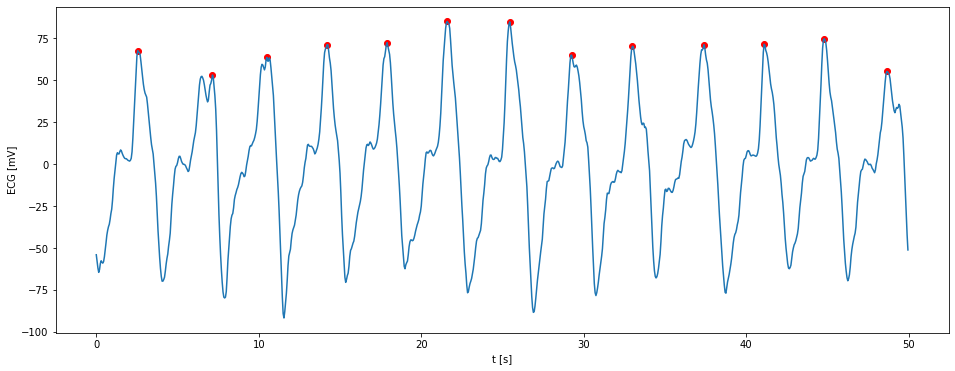

15.600000000000001 bpm


In [10]:
### musterloesung

# peak detection method
# um mehrfache Peaks in einer Atmungs-Wellenform zu vermeiden, 
# muss die Distanz zu den Nachbarn erhöht werden, in denen nach dem höchsten Wert gesucht wird.
peaks = sgn.find_peaks(signal, height=25, distance=20)
peaks = peaks[0]

# Signal visualisation
# Plotting commands
plt.plot(timesteps,signal)
plt.scatter(timesteps[peaks], signal[peaks], color='red')
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

# calculate respiratory frequency
resp = (len(peaks) / (len(signal) / sampling_frequency)) * 60
print(str(resp) + " bpm")

**Q6:** Bestimmen Sie die Atemfrequenz aus dem Airflow Signal. Stimmen die Werte der unterschiedlichen Messungen überein?

In [11]:
# relative path to file
data_dir = './input-data'

# filename 
file_name = '07_features_C001901_control.REC_Airflow_clip.dat'
# metadata
sampling_frequency = 20
physical_minimum=-50
physical_maximum=50
digital_minimum=-210
digital_maximum=209
signal_label = 'ECG'

# read signal
signal = np.fromfile(os.path.join(data_dir,file_name),dtype=np.int16)
physical_dim='uV'
plot_label = signal_label + ' [' + physical_dim + ']'
#scaling
digital_diff = digital_maximum-digital_minimum
physical_diff = physical_maximum-physical_minimum
signal = (signal-digital_minimum)/(digital_diff)*(physical_diff)+physical_minimum

# define time axis in seconds
timesteps = np.arange(signal.size)/sampling_frequency

In [ ]:
plt.rcParams["figure.figsize"] = (16,6)

# peak detection method
peaks = pass

# Signal visualisation
# Plotting commands
plt.plot(timesteps,signal)
plt.scatter(timesteps[peaks], signal[peaks], color='red')
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

# calculate respiratory frequency
resp = pass
print(str(resp) + " bpm")

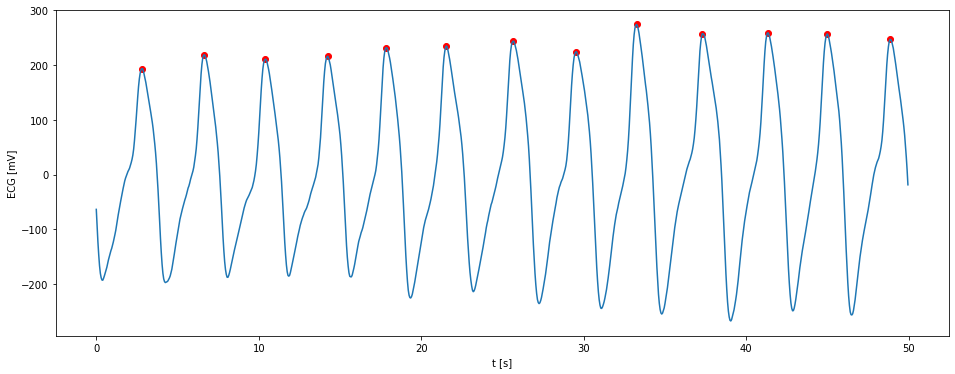

15.600000000000001 bpm


In [12]:
### musterloesung

plt.rcParams["figure.figsize"] = (16,6)

# peak detection method
peaks = sgn.find_peaks(signal)
peaks = peaks[0]

# Signal visualisation
# Plotting commands
plt.plot(timesteps,signal)
plt.scatter(timesteps[peaks], signal[peaks], color='red')
# xlabel 
plt.xlabel('t [s]')
# ylabel 
plt.ylabel(plot_label)
# show the plot
plt.show()

# calculate respiratory frequency
resp = (len(peaks) / (len(signal) / sampling_frequency)) * 60
print(str(resp) + " bpm")

### musterloesung

**A6:** Die Werte von rund 15.6 stimmen erwartungsgemäß in allen Messungen überein, einschließlich des EKGs. Auch in den jeweiligen Fourier-Transformationen stimmt der visuell geschätzte Wert mit dem berechneten überein.

**Q6F:** Bestimmen Sie die Atemfrequenz der obigen Datensätze mithilfe einer Fourier-Transformation (s. Q2).

Text(0, 0.5, 'Abs [dft]')

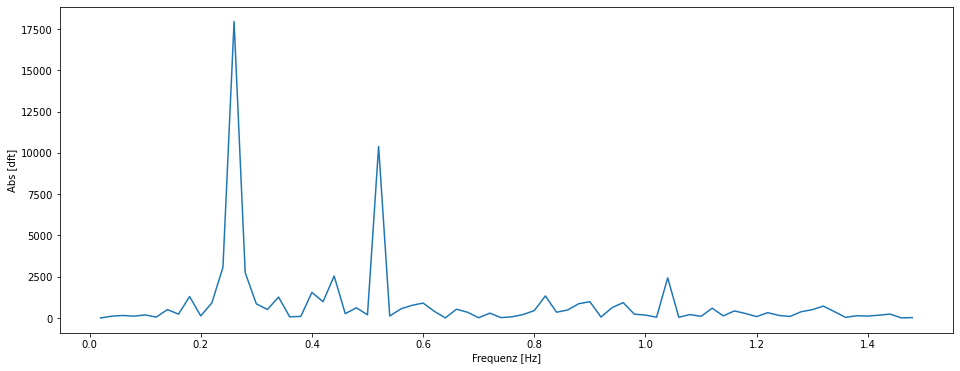

In [13]:
### musterloesung

## Chest

# relative path to file
data_dir = './input-data'

# filename 
file_name = '07_features_C001901_control.REC_Chest_clip.dat'
# metadata
sampling_frequency = 20
physical_minimum=-50
physical_maximum=50
digital_minimum=-210
digital_maximum=209
signal_label = 'ECG'

# read signal
signal = np.fromfile(os.path.join(data_dir,file_name),dtype=np.int16)
physical_dim='uV'
plot_label = signal_label + ' [' + physical_dim + ']'
#scaling
digital_diff = digital_maximum-digital_minimum
physical_diff = physical_maximum-physical_minimum
signal = (signal-digital_minimum)/(digital_diff)*(physical_diff)+physical_minimum

# define time axis in seconds
timesteps = np.arange(signal.size)/sampling_frequency

plt.rcParams["figure.figsize"] = (16,6)

# fft
fft = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal))*sampling_frequency

# plot fft
mask = np.where((freq > 0) & (freq < 1.5))
plt.plot(freq[mask], abs(fft.real[mask]))
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Abs [dft]')

Text(0, 0.5, 'Abs [dft]')

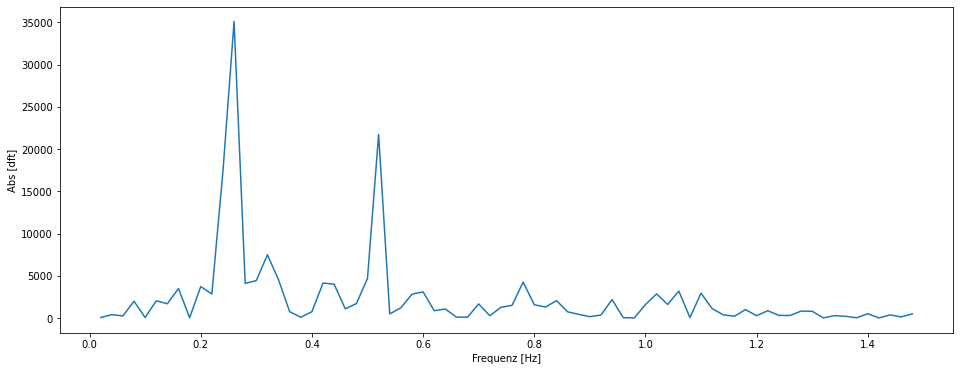

In [14]:
### musterloesung

## Airflow

# relative path to file
data_dir = './input-data'

# filename 
file_name = '07_features_C001901_control.REC_Airflow_clip.dat'
# metadata
sampling_frequency = 20
physical_minimum=-50
physical_maximum=50
digital_minimum=-210
digital_maximum=209
signal_label = 'ECG'

# read signal
signal = np.fromfile(os.path.join(data_dir,file_name),dtype=np.int16)
physical_dim='uV'
plot_label = signal_label + ' [' + physical_dim + ']'
#scaling
digital_diff = digital_maximum-digital_minimum
physical_diff = physical_maximum-physical_minimum
signal = (signal-digital_minimum)/(digital_diff)*(physical_diff)+physical_minimum

# define time axis in seconds
timesteps = np.arange(signal.size)/sampling_frequency

plt.rcParams["figure.figsize"] = (16,6)

# fft
fft = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal))*sampling_frequency

# plot fft
mask = np.where((freq > 0) & (freq < 1.5))
plt.plot(freq[mask], abs(fft.real[mask]))
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Abs [dft]')

### musterloesung

**A6F**: Es wird jeweils der höchste Peak (ca. 0.26) als Atemfrequenz angenommen, da er im erwarteten Bereich liegt.